### 1、SVM支持向量机原理可视化

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC #分类算法
from sklearn import datasets

#### 1.1创建数据

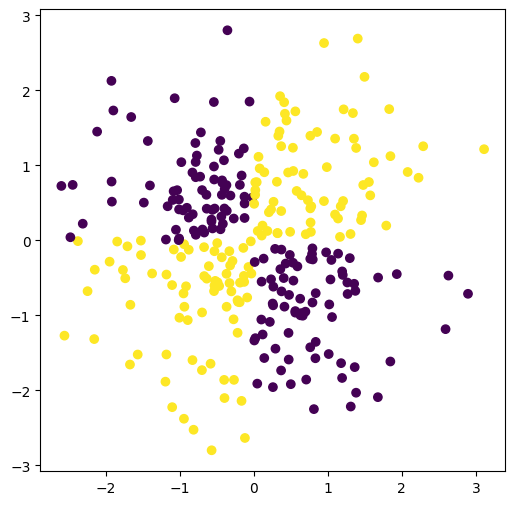

In [3]:
rs = np.random.RandomState(256) #种子，生成随机数字，固定了
x = rs.randn(300,2)
#y目标值，一三象限是1，二四象限是0
y = [1 if i>0 else 0 for i in x[:,0] * x[:,1]]
plt.figure(figsize=(6,6))
plt.scatter(x[:,0],x[:,1],c=y)

#### 1.2建模学习

(18, 20)

(18, 20)

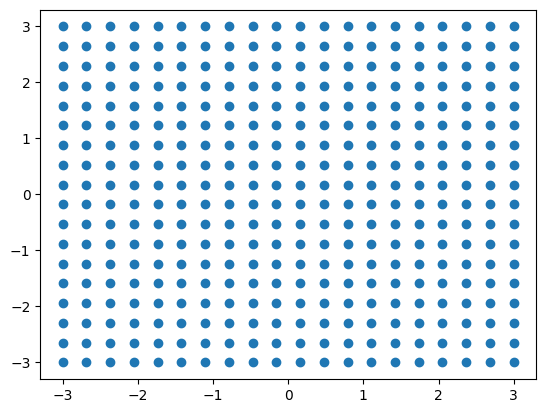

In [6]:
svc = SVC(kernel='rbf')
svc.fit(x,y)
x1 = np.linspace(-3,3,20)
x2 = np.linspace(-3,3,18)

x1,x2 = np.meshgrid(x1,x2)
display(x1.shape,x2.shape)
plt.scatter(x1,x2)

#### 1.3创建测试数据

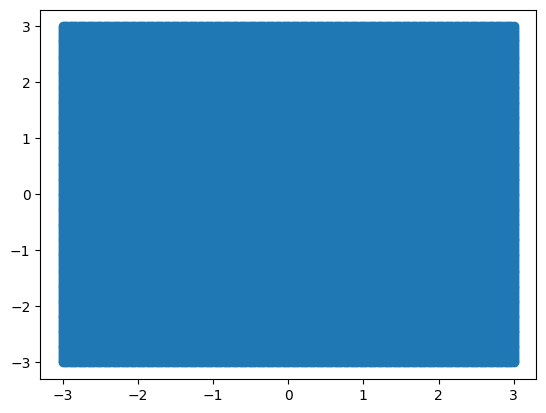

In [8]:
x1 = np.linspace(-3,3,200)
x2 = np.linspace(-3,3,180)

x1,x2 = np.meshgrid(x1,x2)
x_test = np.column_stack([x1.ravel(),x2.ravel()])
plt.scatter(x_test[:,0],x_test[:,1])

#### 1.4算法预测

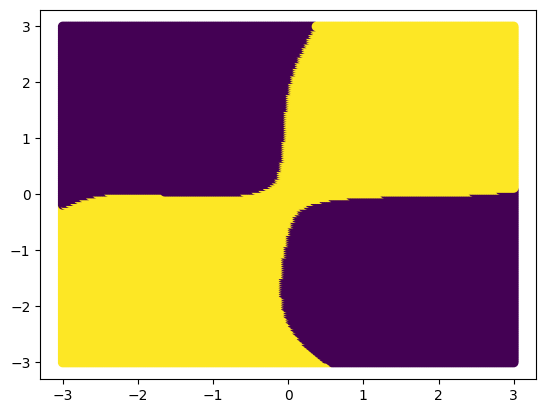

In [9]:
y_pred = svc.predict(x_test)
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)

#### 1.5算法原理可视化

In [10]:
d = svc.decision_function(x_test)
d

array([0.079971  , 0.08556803, 0.09146665, ..., 0.31020115, 0.30330881,
       0.29658013], shape=(36000,))

In [11]:
d.max()

np.float64(2.9853508596862146)

In [12]:
d.min()

np.float64(-3.381189115998357)

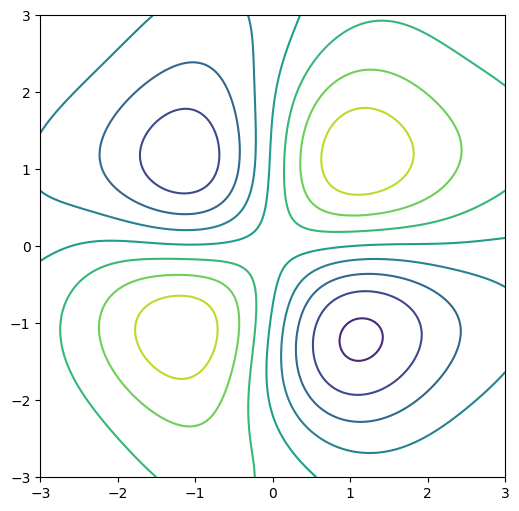

In [19]:
#轮廓线
plt.figure(figsize=(6,6))
plt.contour(x1,x2,d.reshape(180,200))

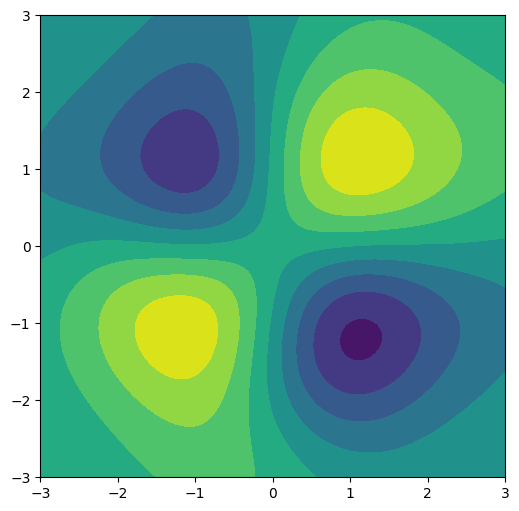

In [20]:
#轮廓面
plt.figure(figsize=(6,6))
plt.contourf(x1,x2,d.reshape(180,200))

#### 3D显示距离

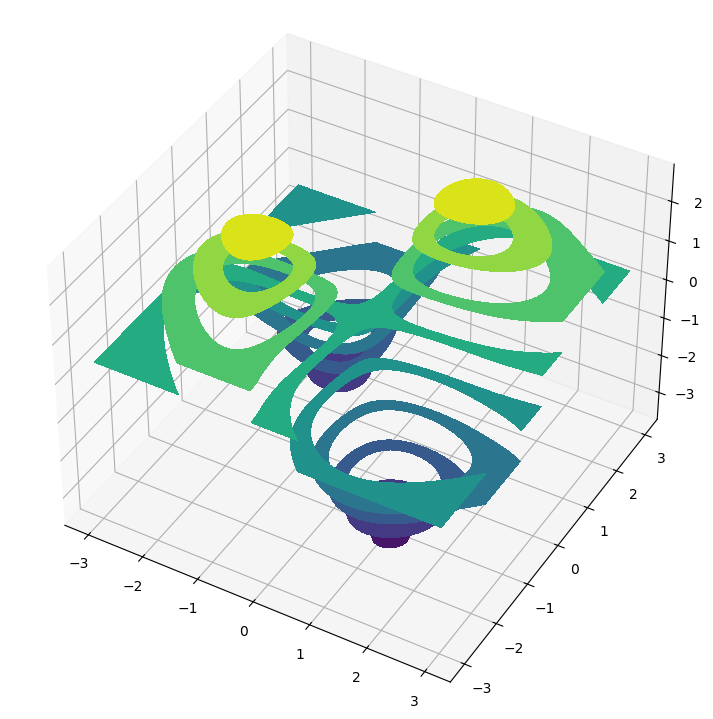

In [23]:
plt.figure(figsize=(12,9))
ax = plt.subplot(111,projection='3d')
ax.contourf(x1,x2,d.reshape(180,200))
ax.view_init(40,-60)

### 2、SVC参数优化

In [24]:
import numpy as np
from sklearn.svm import SVC

In [25]:
def read_data(path):
    with open(path) as f:
        lines = f.readlines()
    lines = [eval(line.strip())for line in lines]
    x,y = zip(*lines)
    x = np.array(x)
    y = np.array(y)
    return x,y